In [37]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats

conn = sqlite3.connect('survey.db')
df = pd.read_sql('SELECT * FROM survey_data', conn)



In [38]:
job_sat = df.replace(df["JobSat"].value_counts().idxmax(),np.nan).dropna()
p_coeff,p_value = stats.pearsonr(job_sat['JobSat'], job_sat['YearsCodePro'])

correlation_matrix = job_sat[["JobSat","YearsCodePro"]].corr()
print(correlation_matrix)
print(f"Pearson Coefficient: {p_coeff}, P-value: {p_value}")


                JobSat  YearsCodePro
JobSat        1.000000      0.107548
YearsCodePro  0.107548      1.000000
Pearson Coefficient: 0.10754786870217446, P-value: 2.0430037562988607e-58


In [39]:
print("As perason corefficient is low therefore weak correaktion between JobSat and YearsCodePro")

As perason corefficient is low therefore weak correaktion between JobSat and YearsCodePro


In [40]:
print(df["ConvertedCompYearly"].describe())

count    3.366800e+04
mean     5.298704e-03
std      9.574343e-03
min      6.151347e-08
25%      2.973130e-03
50%      5.299679e-03
75%      5.299679e-03
max      1.000000e+00
Name: ConvertedCompYearly, dtype: float64


In [41]:
threshold = 5 * df["ConvertedCompYearly"].std() + df["ConvertedCompYearly"].mean()

outliners = df[df["ConvertedCompYearly"] > threshold]

outliners["ConvertedCompYearly"].sort_values(ascending=False).head(10)

9026     1.000000
7385     0.849994
16608    0.553621
10032    0.390030
10087    0.303678
11091    0.207160
13923    0.158958
19558    0.137658
19967    0.132465
7950     0.125982
Name: ConvertedCompYearly, dtype: float64

-0.0005166930551983098 0.00878950273018457
ConvertedCompYearly
0.009227    207
0.012303    195
0.011072    148
0.009842    132
0.010457    105
           ... 
0.010708      1
0.079283      1
0.012731      1
0.055362      1
0.012025      1
Name: count, Length: 672, dtype: int64


<Axes: xlabel='ConvertedCompYearly'>

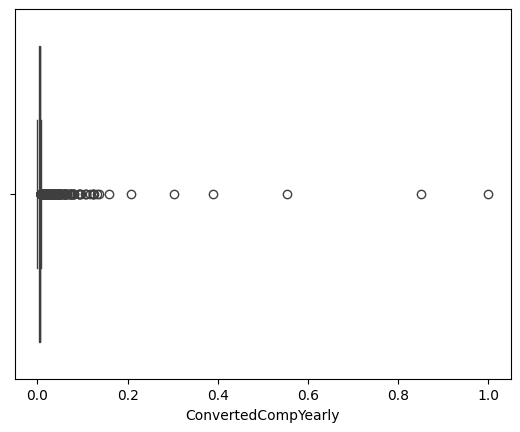

In [42]:
Q1 = df["ConvertedCompYearly"].quantile(0.25)
Q3 = df["ConvertedCompYearly"].quantile(0.75)

IQR = Q3 - Q1

lower_bound =  Q1 - 1.5 * IQR
upper_bound =  Q3 + 1.5 * IQR

outliners = df[(df["ConvertedCompYearly"] < lower_bound) | (df["ConvertedCompYearly"] > upper_bound)]

print(lower_bound, upper_bound)
print(outliners["ConvertedCompYearly"].value_counts())

sns.boxplot(x=df["ConvertedCompYearly"])


<Axes: xlabel='ConvertedCompYearly'>

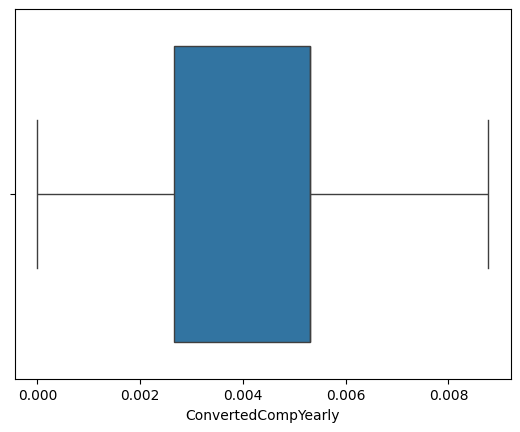

In [43]:
df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

sns.boxplot(x=df_clean["ConvertedCompYearly"])

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

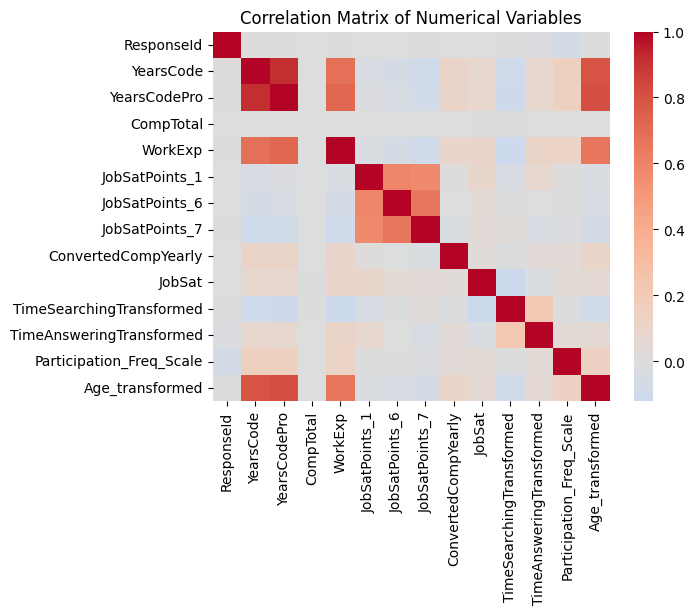

In [44]:
numeric_col = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_col.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')

                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.099193        0.013318
WorkExp                         0.099193  1.000000       -0.025278
JobSatPoints_1                  0.013318 -0.025278        1.000000


<Axes: >

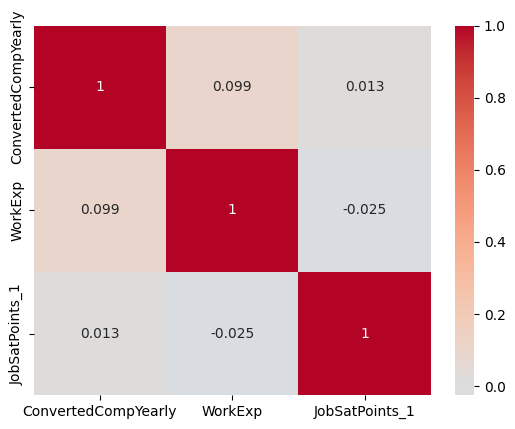

In [45]:
correlation_matrix=df[["ConvertedCompYearly","WorkExp","JobSatPoints_1"]].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0)

Text(0, 0.5, 'Yearly Compensation (USD)')

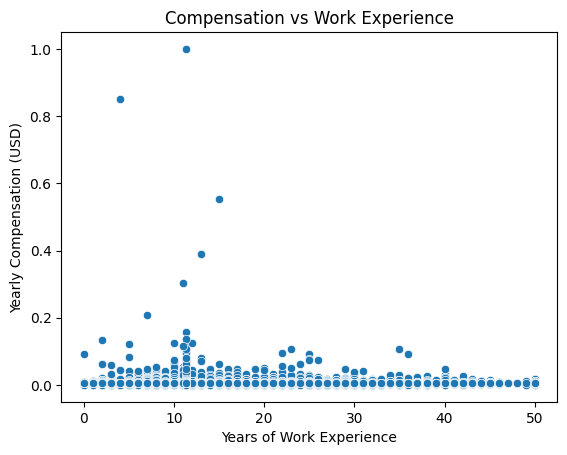

In [46]:
sns.scatterplot(y=df["ConvertedCompYearly"], x=df["WorkExp"])
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Yearly Compensation (USD)')

Text(0, 0.5, 'Yearly Compensation (USD)')

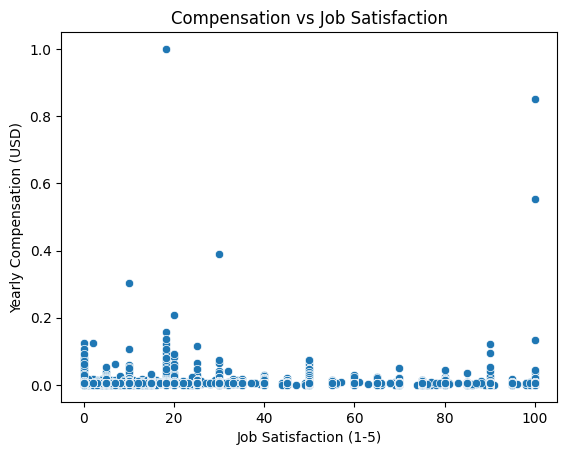

In [47]:
sns.scatterplot(y=df["ConvertedCompYearly"], x=df["JobSatPoints_1"])
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction (1-5)')
plt.ylabel('Yearly Compensation (USD)')

In [48]:
df.to_sql('survey_data', conn, if_exists='replace', index=False)
conn.close()
